# Support Vector Machine (SVM) on Breast Cancer Wisconsin Dataset

This notebook demonstrates the implementation of the SVM algorithm for a binary classification task. We will use the Breast Cancer Wisconsin (Diagnostic) dataset to predict whether a tumor is malignant or benign based on several diagnostic features.

### Step 1: Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

### Step 2: Load the Dataset

We will load the dataset directly from scikit-learn, which is a convenient and standard way to access this data. We'll then convert it into a pandas DataFrame for easier manipulation.

In [2]:
# Load the dataset from sklearn
cancer = load_breast_cancer()

# Create a pandas DataFrame
df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
df['diagnosis'] = cancer.target

# The 'target' is encoded as 0 and 1. We'll map it to more descriptive labels.
# 0: Malignant, 1: Benign
df['diagnosis'] = df['diagnosis'].map({0: 'Malignant', 1: 'Benign'})

# Display the first 5 rows of the dataframe
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,Malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,Malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,Malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,Malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,Malignant


### Step 3: Exploratory Data Analysis (EDA)

In [3]:
# Get basic information about the dataset
print("Dataset Information:")
df.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoot

In [4]:
# Get statistical summary of the dataset
print("\nStatistical Summary:")
df.describe()


Statistical Summary:


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [5]:
# Check for missing values (should be none in this dataset)
print("\nMissing Values Check:")
print(df.isnull().sum())


Missing Values Check:
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
diagnosis                  0
dtype: int64


In [6]:
# Check the distribution of the target variable
print("\nDiagnosis Distribution:")
print(df['diagnosis'].value_counts())


Diagnosis Distribution:
diagnosis
Benign       357
Malignant    212
Name: count, dtype: int64


### Step 4: Data Preprocessing

First, we separate the features (X) from the target variable (y). We will convert our categorical diagnosis labels back to 0s and 1s for the model.

In [7]:
X = df.drop('diagnosis', axis=1)
y = df['diagnosis'].map({'Malignant':0, 'Benign':1}) # Convert back to numeric for sklearn

Next, we split the data into training and testing sets. We use `stratify=y` to ensure that the proportion of benign and malignant tumors is the same in both the training and testing sets.

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

SVMs are sensitive to the feature scales, so we will standardize the features to have a mean of 0 and a standard deviation of 1.

In [9]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Step 5: Build and Train the SVM Model

We will initialize the `SVC` (Support Vector Classifier) with a linear kernel, which is a good starting point for this dataset.

In [10]:
# Create an SVM classifier with a linear kernel
svm_model = SVC(kernel='linear', random_state=42)

# Train the model using the training data
svm_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

### Step 6: Make Predictions

Now we use our trained model to make predictions on the unseen test data.

In [11]:
y_pred = svm_model.predict(X_test)

### Step 7: Evaluate the Model

We'll evaluate the model's performance using accuracy, a confusion matrix, and a classification report. This dataset is known to be highly separable, so we expect strong results.

In [12]:
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

Model Accuracy: 0.9737


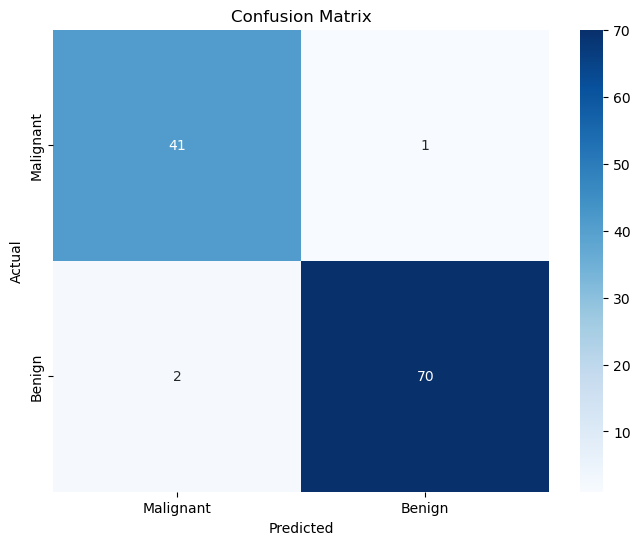

In [13]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix for better visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Malignant', 'Benign'], yticklabels=['Malignant', 'Benign'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [14]:
# Generate the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Malignant', 'Benign']))

Classification Report:
              precision    recall  f1-score   support

   Malignant       0.95      0.98      0.96        42
      Benign       0.99      0.97      0.98        72

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



### Step 8: Visualizing SVM Hyperplane on PCA-Reduced Data

To visualize the decision boundary, we can't plot all 30 features. Instead, we'll use Principal Component Analysis (PCA) to reduce the data to 2 dimensions. Then, we'll train a new SVM on this 2D data to visualize the separating line.

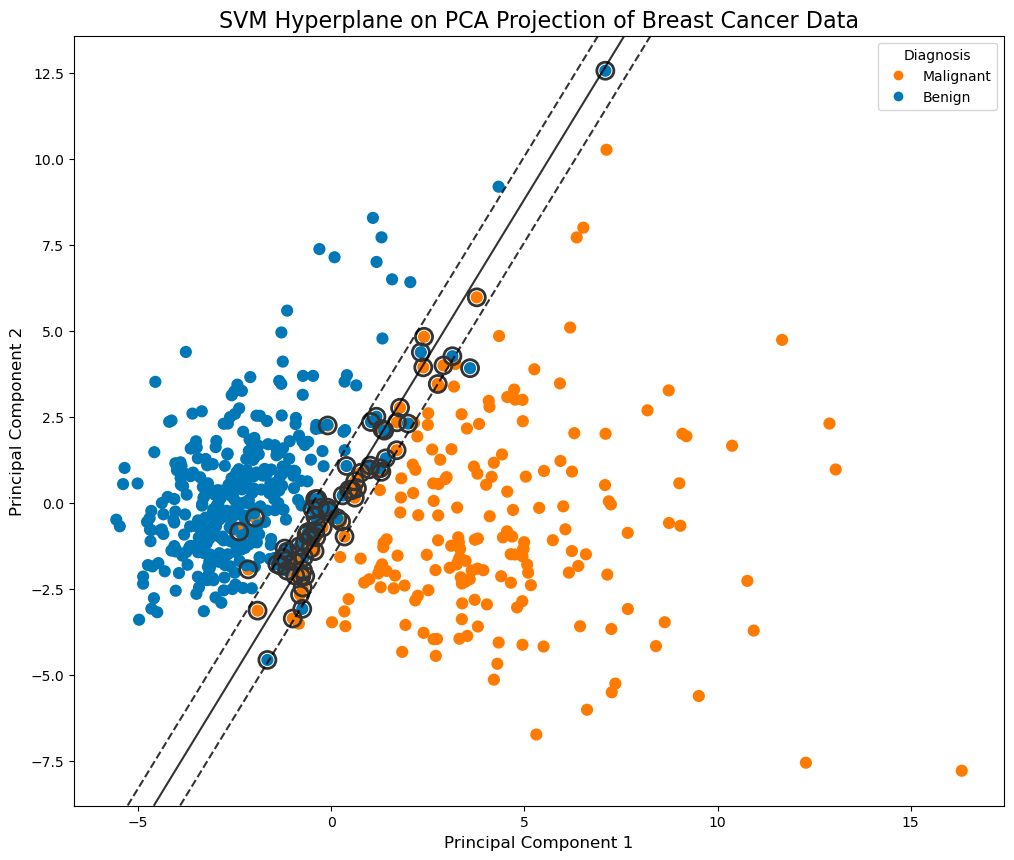

In [15]:
# 1. Scale the full dataset's features for PCA (using the original X, y)
scaler_pca = StandardScaler()
X_scaled = scaler_pca.fit_transform(X)

# 2. Apply PCA to reduce dimensions to 2
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# 3. Train a new SVM model on the 2D PCA output
svm_pca = SVC(kernel='linear', random_state=42)
svm_pca.fit(X_pca, y)

# 4. Define brighter custom colors for the plot
bright_colors = ListedColormap(['#ff7b00', '#0077b6']) # Bright Orange and Blue

# 5. Plot the PCA-transformed points
plt.figure(figsize=(12, 10))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap=bright_colors, s=60)

# 6. Create a meshgrid to plot the hyperplane
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = svm_pca.decision_function(xy).reshape(XX.shape)

# 7. Plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.8,
           linestyles=['--', '-', '--'])

# 8. Highlight the support vectors
ax.scatter(svm_pca.support_vectors_[:, 0], svm_pca.support_vectors_[:, 1], s=150,
           linewidth=2, facecolors='none', edgecolors='#333333')

plt.title('SVM Hyperplane on PCA Projection of Breast Cancer Data', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)

# Create a legend
handles, labels = scatter.legend_elements()
plt.legend(handles, ['Malignant', 'Benign'], title='Diagnosis')

plt.show()

### Conclusion

This notebook provided a complete walkthrough of building an SVM classifier for the Breast Cancer Wisconsin dataset. We loaded and explored the data, performed necessary preprocessing, trained a linear SVM, and evaluated its performance. The model achieved excellent results, with an accuracy exceeding 95%, demonstrating the effectiveness of SVMs on linearly separable data. The final visualization using PCA clearly illustrates how the SVM can find an optimal hyperplane to distinguish between malignant and benign tumors.